In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

%config IPCompleter.greedy=True

pd.options.display.float_format = '{:.2f}'.format

%config IPCompleter.greedy=True

In [4]:
ruta_proyecto = 'C:/Users/mcana/OneDrive/Escritorio/PORTAFOLIO/ML/LEAD_SCORINGLEAD_SCORING_PROYECTO'

In [5]:
nombre_df = 'df_tablon.pickle'


In [7]:
df = pd.read_pickle(ruta_proyecto + '/Datos/Tabajo/' + nombre_df)

In [8]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.727273,0.444444,0
660728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.296655,0.125,0.727273,0.444444,0
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.050,0.545455,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.050,0.727273,0.777778,1
660680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.909091,0.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579697,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.16,0.447183,0.200,0.727273,1.000000,1
579642,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.779049,0.100,0.636364,1.000000,0
579615,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.092430,0.125,0.636364,1.000000,1


## MODELIZACION 

##### Crear el espacio de soluciones

In [10]:
min_k = 3
max_k = 7
soluciones = list(range(min_k, max_k))

In [11]:
# crear listas para guardar la salida de cada metrica 
codo = []
silueta = []
calins = []
davies = []

In [14]:
for solucion in soluciones : 
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    #Recoger las métricas 
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

In [22]:
# IDENTIFICAR LA MEJOR SOLUCIÓN 
codo = codo[:4]
metricas = pd.DataFrame({'solucion':soluciones,
              'codo': codo,
              'silueta':silueta,
              'calins':calins,           
              'davies':davies}).set_index('solucion')

metricas

,codo,silueta,calins,davies
solucion,,,,
3,13816.83,0.19,1060.78,2.06
4,13816.83,0.19,845.73,1.98
5,13065.10,0.16,731.61,2.26
6,12431.39,0.16,651.24,2.33


###### Analizar los gráficos 


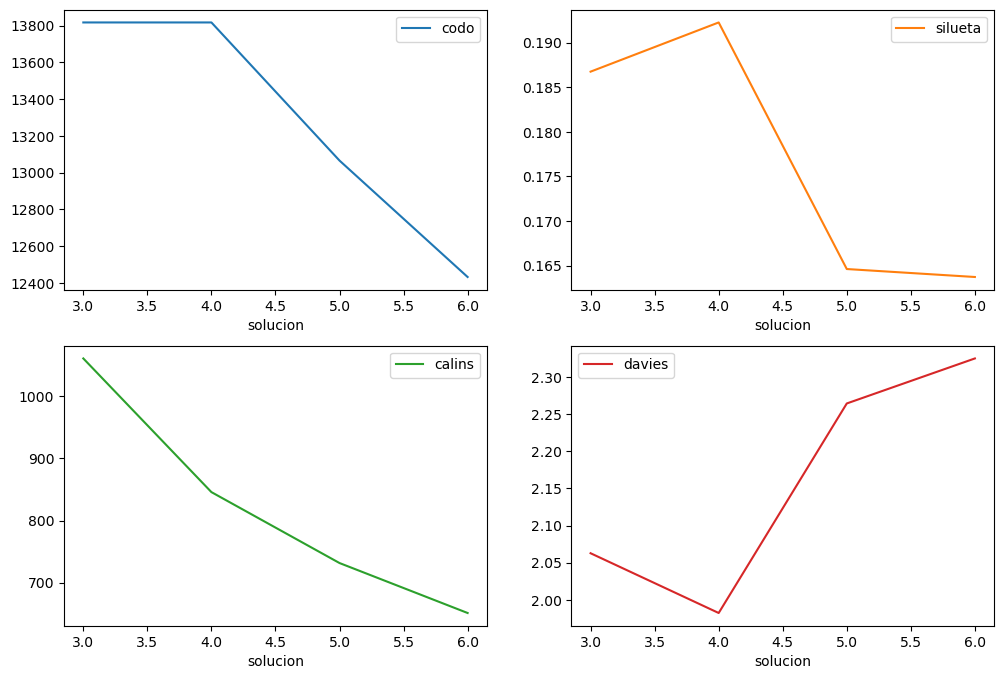

In [23]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);


###### Elegir el que más nos gusta

In [28]:
#mejor solucion 
mejor_solucion = 4
#Instanciar 
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)

#Entrenar 
cluster.fit(df)

KMeans(n_clusters=4, n_init=10)

###### Evaluar

In [29]:
df['segmento'] = cluster.predict(df)

###### perfilar los segmentos

In [30]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
origen_API,0.032462,0.948896,0.000000,0.021944
origen_Landing Page Submission,0.962787,0.000000,0.886364,0.976489
origen_Lead Add Form,0.004751,0.038486,0.106880,0.001567
origen_OTROS,0.000000,0.012618,0.006757,0.000000
fuente_Chat,0.016627,0.174132,0.000614,0.014107
fuente_Direct Traffic,0.688836,0.041009,0.188575,0.677116
fuente_Google,0.083927,0.500315,0.632064,0.090909
fuente_OTROS,0.012668,0.062461,0.017199,0.003135
fuente_Organic Search,0.193191,0.191798,0.060197,0.213166
fuente_Reference,0.004751,0.030284,0.101351,0.001567


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, 660737 to 579533
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                5114 non-null   float64
 1   origen_Landing Page Submission            5114 non-null   float64
 2   origen_Lead Add Form                      5114 non-null   float64
 3   origen_OTROS                              5114 non-null   float64
 4   fuente_Chat                               5114 non-null   float64
 5   fuente_Direct Traffic                     5114 non-null   float64
 6   fuente_Google                             5114 non-null   float64
 7   fuente_OTROS                              5114 non-null   float64
 8   fuente_Organic Search                     5114 non-null   float64
 9   fuente_Reference                          5114 non-null   float64
 10  ult_actividad_Chat Conversation   

In [33]:
df.drop(columns = ['origen_API',
                  'origen_Landing Page Submission',
                  'origen_Lead Add Form',
                  'origen_OTROS',
                  'fuente_Chat',
                  'fuente_Direct Traffic',
                  'fuente_Google',
                  'fuente_OTROS',
                  'fuente_Organic Search',
                  'fuente_Reference',
                   'descarga_lm_No',
                   'descarga_lm_Yes',
                   'visitas_total_mms',
                   'paginas_vistas_visita_mms'
                    ],inplace=True)

# MODELIZACION

In [34]:
min_k = 3
max_k = 7
soluciones = list(range(min_k, max_k))

In [35]:
# crear listas para guardar la salida de cada metrica 
codo = []
silueta = []
calins = []
davies = []

In [36]:
# ANALIZAR EL ESPACIO DE SOLUCIONES
for solucion in soluciones : 
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    #Recoger las métricas 
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

In [37]:
# IDENTIFICAR LA MEJOR SOLUCIÓN 
codo = codo[:4]
metricas = pd.DataFrame({'solucion':soluciones,
              'codo': codo,
              'silueta':silueta,
              'calins':calins,           
              'davies':davies}).set_index('solucion')

metricas

,codo,silueta,calins,davies
solucion,,,,
3,10250.81,0.19,1388.88,1.82
4,9246.35,0.21,1211.34,1.90
5,8768.60,0.18,1027.41,1.81
6,8315.12,0.21,922.30,2.01


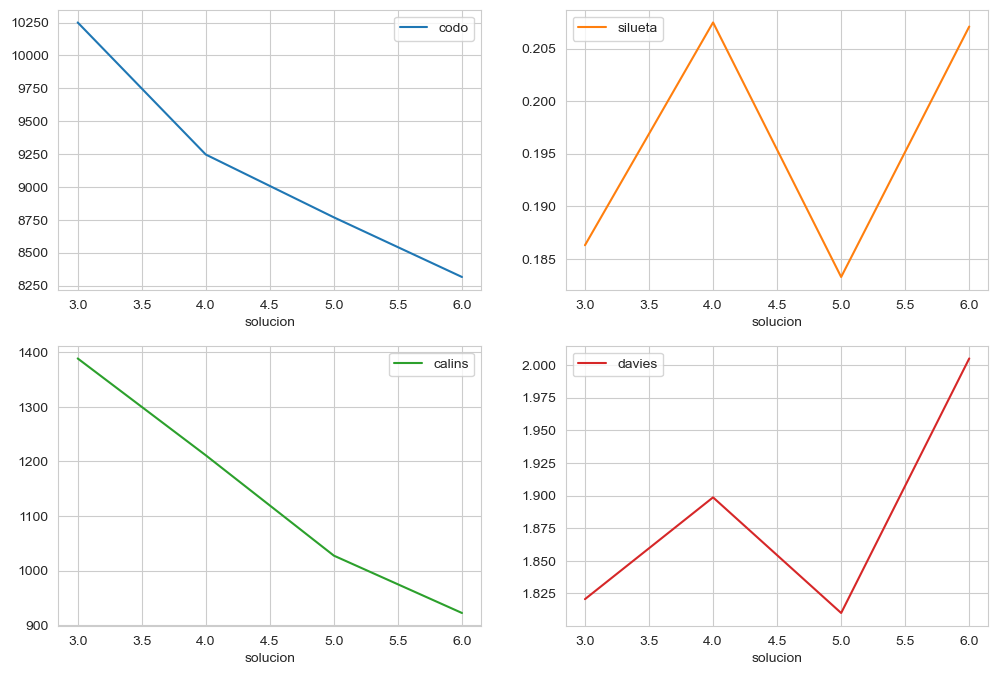

In [38]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [43]:
#mejor solucion 
mejor_solucion = 5
#Instanciar 
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)

#Entrenar 
cluster.fit(df)

KMeans(n_clusters=5, n_init=10)

In [44]:
df['segmento'] = cluster.predict(df)

In [45]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4
ult_actividad_Chat Conversation,0.078457,0.000000,0.145631,0.000000,0.013544
ult_actividad_Converted to Lead,0.211436,0.000000,0.090846,0.000000,0.031603
ult_actividad_Email Link Clicked,0.094415,0.000000,0.037448,0.000000,0.031603
ult_actividad_Email Opened,0.000000,0.000000,0.294730,1.000000,0.408578
ult_actividad_OTROS,0.208777,0.000000,0.061026,0.000000,0.079007
ult_actividad_Page Visited on Website,0.406915,0.000000,0.079057,0.000000,0.047404
ult_actividad_SMS Sent,0.000000,1.000000,0.291262,0.000000,0.388262
"ambito_Banking, Investment And Insurance",0.050532,0.071914,0.009709,0.056630,0.051919
ambito_Business Administration,0.065160,0.076774,0.008322,0.070442,0.065463
ambito_Finance Management,0.163564,0.160350,0.014563,0.167127,0.148984


In [46]:
df.segmento.value_counts(normalize=True)

segmento
3   0.28
2   0.28
1   0.20
0   0.15
4   0.09
Name: proportion, dtype: float64

solo hay un 10% de los leads que estamos generando de muy buena calidad (se segmentan en el 4)

el 71% de los leads que estamos generando son de muy mala calidad (se segmentan en el 0,2,3)

Por lo que el lead 0,2,3 yo no se lo pasaría a las redes comerciales. y asi poder incrementar el éxito de las acciones